### Resize images: Training and Testing Dataset

In [9]:
import cv2
import os

## path folder can be changed for all the folders to size the images
path = 'C:/Users/Trisha/BrainTumorClassification/Testing/pituitary/'


im_size = 512   # Input image resolution must be a power-of-two otherwise you will get error. 
                 #Pixel resolutions that are powers of 2 (512 x 512, 1024 x 1024, 2048 x 2048, etc).

images = []

for file in os.listdir(path):
        img = cv2.imread(path + '/' + file)  # reading that image as array
        img = cv2.resize(img, (im_size, im_size))
        print(img.shape)
        images.append(img)
        # Save the image in Output Folder
        cv2.imwrite('C:/Users/Trisha/BrainTumorClassification/brainTumorDatasets/test/pituitary/' + str(file), img)

(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 512, 3)
(512, 

### Split folder: split resize Training folder and get train and val dataset(80% train and 20% validation data)

In [11]:
import splitfolders

input_folder = "C:/Users/Trisha/BrainTumorClassification/resizeTrainData/"

splitfolders.ratio(input_folder, output="C:/Users/Trisha/BrainTumorClassification/brainTumorDatasets/", seed=42, ratio=(.8, .2), group_prefix=None)

Copying files: 5712 files [00:05, 997.94 files/s] 


### Multiclass Classification

### Libraries

In [12]:
import sys
import os
from keras.layers import *
from keras.optimizers import *
from keras.applications import *
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras import regularizers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall, AUC

In [20]:
count = 0 
dirs_train = os.listdir('C:/Users/Trisha/BrainTumorClassification/brainTumorDatasets/train/')
for dir in dirs_train :
    files = list(os.listdir('C:/Users/Trisha/BrainTumorClassification/brainTumorDatasets/train/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Brain Tumor Train Folder has '+ str(count) + ' Images')

glioma Folder has 1056 Images
meningioma Folder has 1071 Images
notumor Folder has 1276 Images
pituitary Folder has 1165 Images
Brain Tumor Train Folder has 4568 Images


<BarContainer object of 4 artists>

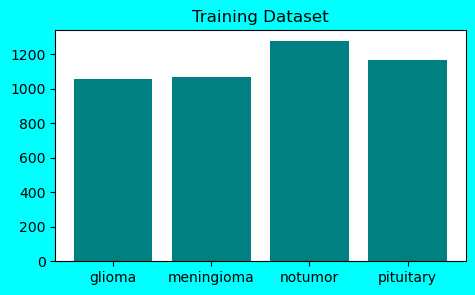

In [19]:
names = ["glioma", "meningioma", "notumor", "pituitary"]
values = [1056, 1071, 1276, 1165]
plt.figure(figsize=(18, 3), facecolor='cyan')
plt.subplot(131)
plt.title('Training Dataset')
plt.bar(names, values, facecolor='teal')

In [22]:
count = 0 
dirs_val = os.listdir('C:/Users/Trisha/BrainTumorClassification/brainTumorDatasets/val/')
for dir in dirs_val :
    files = list(os.listdir('C:/Users/Trisha/BrainTumorClassification/brainTumorDatasets/val/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Brain Tumor Validation Folder has '+ str(count) + ' Images')

glioma Folder has 265 Images
meningioma Folder has 268 Images
notumor Folder has 319 Images
pituitary Folder has 292 Images
Brain Tumor Validation Folder has 1144 Images


Text(0.5, 0.98, 'Validation Dataset')

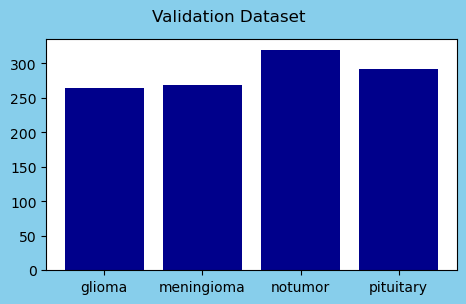

In [42]:
names = ["glioma", "meningioma", "notumor", "pituitary"]
values = [265, 268, 319, 292]
plt.figure(figsize=(18, 3),facecolor='skyblue')
plt.subplot(132)
plt.bar(names, values, facecolor='darkblue')
plt.suptitle('Validation Dataset')

In [24]:
count = 0 
dirs_test = os.listdir('C:/Users/Trisha/BrainTumorClassification/brainTumorDatasets/test/')
for dir in dirs_test :
    files = list(os.listdir('C:/Users/Trisha/BrainTumorClassification/brainTumorDatasets/test/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Brain Tumor Test Folder has '+ str(count) + ' Images')

glioma Folder has 300 Images
meningioma Folder has 306 Images
notumor Folder has 405 Images
pituitary Folder has 300 Images
Brain Tumor Test Folder has 1311 Images


Text(0.5, 1.0, 'Test Dataset')

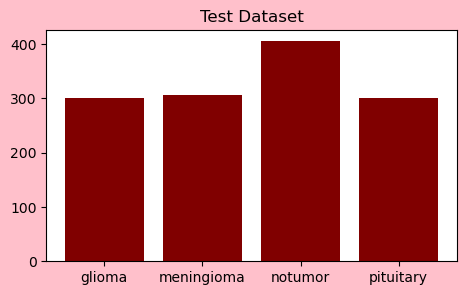

In [25]:
names = ["glioma", "meningioma", "notumor", "pituitary"]
values = [300, 306, 405, 300]
plt.figure(figsize=(18, 3),facecolor='pink')
plt.subplot(133)
plt.bar(names, values, facecolor='maroon')
plt.title('Test Dataset')

### Visualize image using Pillow library

In [26]:
import pathlib
from PIL import Image

image = Image.open("C:/Users/Trisha/BrainTumorClassification/brainTumorDatasets/train/meningioma/Tr-me_0076.jpg")
image.show()

### Hyperparameters

In [31]:
# hyper parameters for model
num_classes = 4  # number of classes
based_model_last_block_layer_number = 10 #Take few layers
img_width, img_height = 224, 224
batch_size = 64
num_epoch = 50


# This parameter is for augmentation
transformation_ratio = .05  

# number of images
train_samples = 4568  
validation_samples = 1144 
test_samples=1311

### Model create and Fit the model
##### Used Adam optimizer, learning rate = 1e-4 and categorical_crossentropy loss function for multiclass classification

In [32]:
# All directory: Train, validation and test
train_data_dir = 'C:/Users/Trisha/BrainTumorClassification/brainTumorDatasets/train/'
validation_data_dir = 'C:/Users/Trisha/BrainTumorClassification/brainTumorDatasets/val/'
test_data_dir = 'C:/Users/Trisha/BrainTumorClassification/brainTumorDatasets/test/'

IMG_SHAPE = (224, 224, 3)
    
base_model = VGG19(input_shape=IMG_SHAPE, weights="imagenet", include_top=False)

# Top Model Block    
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu', name='fc1', kernel_regularizer=regularizers.L1(l1=0.01))(x)
x = Dropout(0.2)(x)

# softmax is used for multiclass classification
predictions = Dense(num_classes, activation='softmax', name='predictions')(x)
model = Model(base_model.input, predictions)
print(model.summary())

for layer in base_model.layers:
    layer.trainable = False

# Data augmentation 
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                rotation_range=transformation_ratio,
                                shear_range=transformation_ratio,
                                zoom_range=transformation_ratio,
                                cval=transformation_ratio,
                                horizontal_flip=True,
                                vertical_flip=True)

validation_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=[img_width, img_height],
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                            target_size=[img_width, img_height],
                                                            batch_size=batch_size,
                                                            shuffle=False,
                                                            class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                        target_size=[img_width, img_height],
                                                        batch_size=batch_size,
                                                        shuffle=False,
                                                        class_mode='categorical')


metrics = [Recall(name = 'recall'), Precision(name = 'precision'), AUC(name = 'auc')]

# Model compiling
model.compile(optimizer=Adam(learning_rate=1e-4),
             loss='categorical_crossentropy',  # categorical_crossentropy if multi-class classifier
             metrics=['accuracy', metrics])


# Train model
model.fit(train_generator,
                    steps_per_epoch=train_samples // batch_size,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=validation_samples // batch_size)
    
# Fine-tuning the model 
print("\nStarting to Fine-Tune Model\n")


# Unfreeze the base model
for layer in model.layers[:based_model_last_block_layer_number]:
    layer.trainable = False
for layer in model.layers[based_model_last_block_layer_number:]:
    layer.trainable = True


metrics = [Recall(name = 'recall'), Precision(name = 'precision'), AUC(name = 'auc')]
                  
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy', metrics])


# fine-tune the model
# Here, epoch is 50
history = model.fit(train_generator,
                    steps_per_epoch=train_samples // batch_size,
                    epochs=num_epoch,
                    validation_data=validation_generator,
                    validation_steps=validation_samples // batch_size
                    )

model.save('C:/Users/Trisha/BrainTumorClassification/brainTumor1.h5')

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

### Evaluate the model and find Accuracy, AUC, Recall, Precision

In [33]:
test_score = model.evaluate(test_generator)
print("Loss: ",test_score[0])
print("Accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("AUC: {:.2f}%".format(test_score[4] * 100)) 


21/21 [==============================] - 11s 524ms/step - loss: 0.1645 - accuracy: 0.9825 - recall: 0.9817 - precision: 0.9839 - auc: 0.9955
Loss:  0.16447852551937103
Accuracy: 98.25%
AUC: 99.55%


### Print the Target names

In [34]:
target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

print(target_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


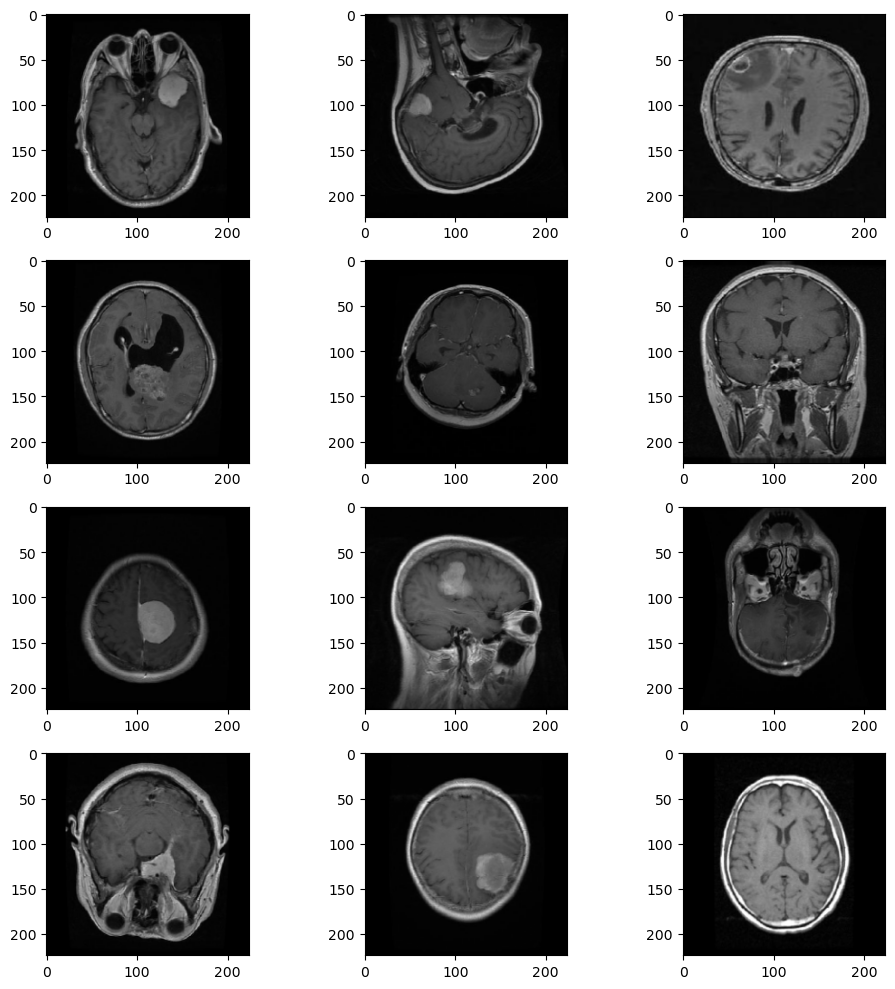

In [35]:
plt.figure(figsize=(10, 10))
for i in range(0, 12):
    plt.subplot(4, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### Confusion Matrix

[0 0 0 ... 3 3 3]
[0 0 0 ... 3 3 3]
Confusion Matrix
[[297   2   0   1]
 [  1 300   4   1]
 [  2   7 396   0]
 [  2   3   0 295]]


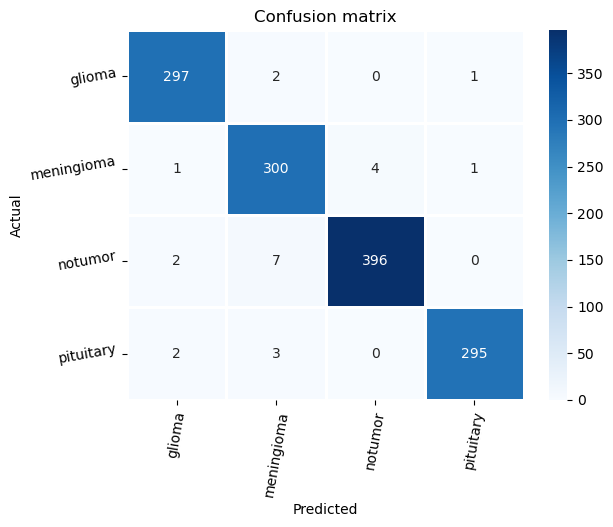

In [36]:
test_generator.reset()
print(test_generator.classes)

Y_pred = model.predict(test_generator, test_samples)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

ax=sns.heatmap(cm, annot=True, linewidths=2, cmap="Blues", fmt="d")

ax.set_title("Confusion matrix")
ax.set_xlabel('Predicted'),
ax.set_ylabel('Actual'),
ax.xaxis.set_ticklabels(target_names,rotation=80)
ax.yaxis.set_ticklabels(target_names,rotation=10)
plt.show()

### Accuracy and Loss Curve

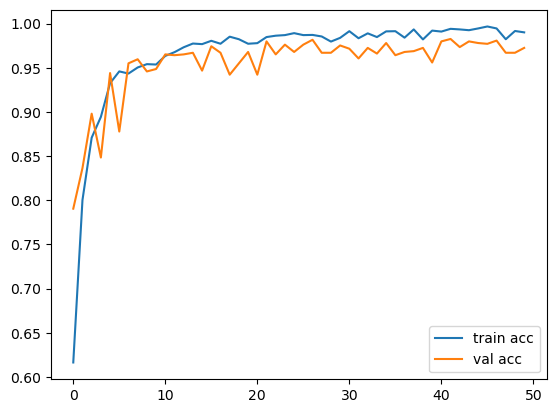

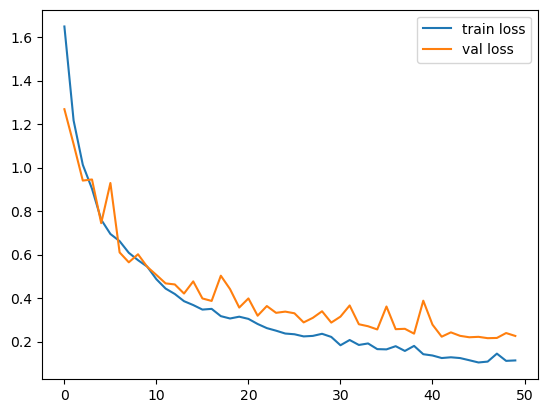

In [37]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

### Classification Report

In [38]:

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(test_generator.classes, y_pred, target_names=['glioma', 'meningioma', 'notumor', 'pituitary']))


Classification Report

              precision    recall  f1-score   support

      glioma       0.98      0.99      0.99       300
  meningioma       0.96      0.98      0.97       306
     notumor       0.99      0.98      0.98       405
   pituitary       0.99      0.98      0.99       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



### Prediction 
##### how many images are correctly and incorrectly predicted

In [39]:
print(test_generator.classes)
print(test_generator.class_indices)

[0 0 0 ... 3 3 3]
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [40]:
#Y_pred = model.predict_generator(test_generator, nb_test_samples // batch_size+1)
Y_pred = model.predict(test_generator, test_samples)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

test_generator.reset()
labels=test_generator.classes
print(labels)

Sum_correct = 0
Sum_incorrect = 0
for i in range(len(y_pred)):
    if y_pred[i] == labels[i]:
        if labels[i] == 0:
            print(f"Predicted label is {y_pred[i]} and Actual label is {labels[i]} glioma Which is correctly predicted!")
        elif labels[i] == 1:
            print(f"Predicted label is {y_pred[i]} and Actual label is {labels[i]} meningioma Which is correctly predicted!")
        elif labels[i] ==2:
            print(f"Predicted label is {y_pred[i]} and Actual label is {labels[i]} notumor Which is correctly predicted!")
        elif labels[i] ==3:
            print(f"Predicted label is {y_pred[i]} and Actual label is {labels[i]} pituitary Which is correctly predicted!")
        Sum_correct+=1
    else:
        #print(f"{y_pred[i]} prediction is WRONG!")
        if labels[i] == 0:
            print(f"\nPredicted label is {y_pred[i]} and Actual label is {labels[i]} glioma Which is wrongly predicted!\n")
        elif labels[i] == 1:
            print(f"\nPredicted label is {y_pred[i]} and Actual label is {labels[i]} meningioma Which is wrongly predicted!\n")
        elif labels[i] ==2:
            print(f"\nPredicted label is {y_pred[i]} and Actual label is {labels[i]} notumor Which is wrongly predicted!\n")
        elif labels[i] ==3:
            print(f"\nPredicted label is {y_pred[i]} and Actual label is {labels[i]} pituitary Which is wrongly predicted!\n")
        Sum_incorrect+=1
        
print("\nTotal wrong predictions are: ", Sum_incorrect)
print("\nTotal correct predictions are: ", Sum_correct)

[0 0 0 ... 3 3 3]
[0 0 0 ... 3 3 3]
Predicted label is 0 and Actual label is 0 glioma Which is correctly predicted!
Predicted label is 0 and Actual label is 0 glioma Which is correctly predicted!
Predicted label is 0 and Actual label is 0 glioma Which is correctly predicted!
Predicted label is 0 and Actual label is 0 glioma Which is correctly predicted!
Predicted label is 0 and Actual label is 0 glioma Which is correctly predicted!
Predicted label is 0 and Actual label is 0 glioma Which is correctly predicted!
Predicted label is 0 and Actual label is 0 glioma Which is correctly predicted!
Predicted label is 0 and Actual label is 0 glioma Which is correctly predicted!
Predicted label is 0 and Actual label is 0 glioma Which is correctly predicted!
Predicted label is 0 and Actual label is 0 glioma Which is correctly predicted!
Predicted label is 0 and Actual label is 0 glioma Which is correctly predicted!
Predicted label is 0 and Actual label is 0 glioma Which is correctly predicted!
Pred